In [1]:
!wget "https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py"
!wget "https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkplot.py"

--2020-05-05 05:06:51--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48075 (47K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  46.95K  --.-KB/s    in 0.02s   

2020-05-05 05:06:51 (1.86 MB/s) - ‘thinkdsp.py’ saved [48075/48075]

--2020-05-05 05:06:53--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkplot.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22756 (22K) [text/plain]
Saving to: ‘thi

In [0]:
# [Sol]
from thinkdsp import Chirp
import numpy as np
PI2 = 2 * np.pi
class JWTrombone(Chirp):
    """Represents a trombone-like signal with varying frequency."""
    
    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times
        
        returns: float wave array
        """
        l1, l2 = 1.0 / self.start, 1.0 / self.end
        lengths = np.linspace(l1, l2, len(ts))
        freqs = 1 / lengths
        
        dts = np.diff(ts, prepend=0)
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        ys = self.amp * np.cos(phases)
        return ys

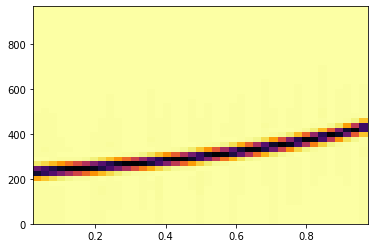

In [16]:
low = 220
high = 440
s1= JWTrombone(start= low, end= high)
w1= s1.make_wave(duration=1)
w1.make_spectrogram(512).plot(high=1000)